# Positional Encoding

This notebook is a hands-on code walkthrough of how positional encoding is defined. 

In [1]:
import math
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [2]:
import torch
import torch.nn as nn

### Positional Encodings Formula

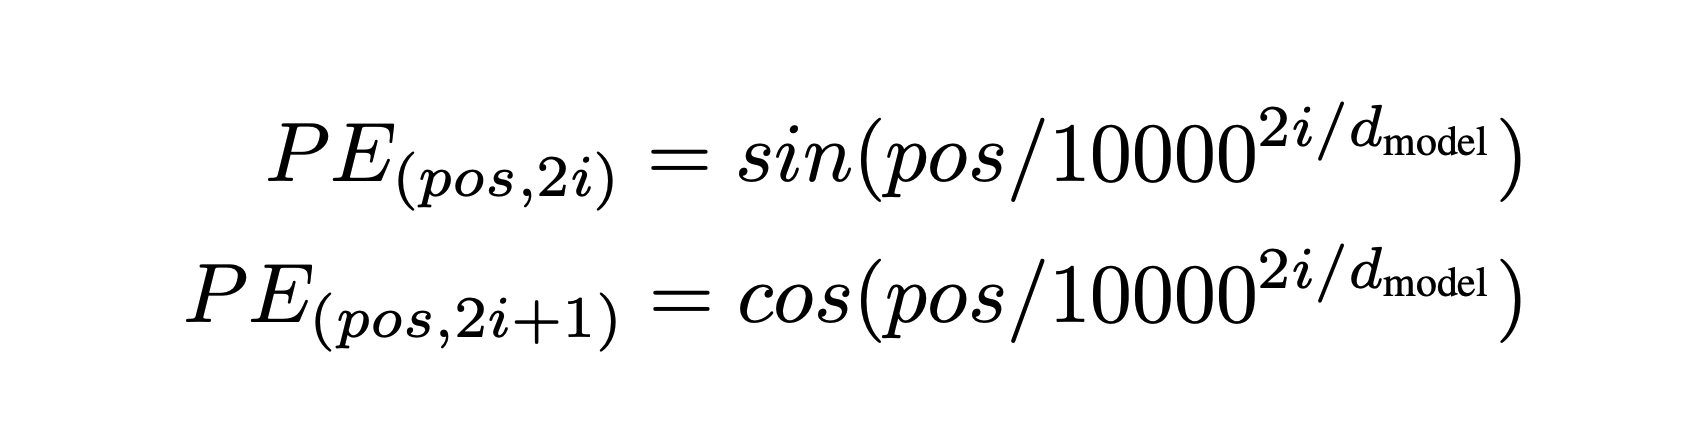

In [8]:
display(Image(filename='images/PositionalEncodings.png'))

- pos = position of each word in the sequence
- i = index of the dimension
- d_model = dimension/embedding length (typically 512)

- we are using sin/cos because of periodicity and constrained values.

In [27]:
max_sequence_length = 10 #Typically in the 1000s
d_model = 6 #Typically 512 based on paper.

In [9]:
even_i = torch.arange(0, d_model, 2).float()
even_i

tensor([0., 2., 4.])

In [10]:
even_denominator = torch.pow(1000, even_i/d_model)
even_denominator

tensor([  1.0000,  10.0000, 100.0000])

In [12]:
odd_i = torch.arange(1, d_model, 2).float()
odd_i

tensor([1., 3., 5.])

In [13]:
# We odd values and offset by 1 compared to the even values. We can simplify this instead 
# of having 2 separate functions

In [15]:
part1 = torch.arange(0, d_model, 2).float()
denominator = torch.pow(1000, part1/d_model)

position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [29]:
denominator

tensor([  1.0000,  10.0000, 100.0000])

In [28]:
position / denominator

tensor([[0.0000, 0.0000, 0.0000],
        [1.0000, 0.1000, 0.0100],
        [2.0000, 0.2000, 0.0200],
        [3.0000, 0.3000, 0.0300],
        [4.0000, 0.4000, 0.0400],
        [5.0000, 0.5000, 0.0500],
        [6.0000, 0.6000, 0.0600],
        [7.0000, 0.7000, 0.0700],
        [8.0000, 0.8000, 0.0800],
        [9.0000, 0.9000, 0.0900]])

In [17]:
even_PE = torch.sin(position / denominator)
odd_PE = torch.cos(position / denominator)

In [18]:
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0998,  0.0100],
        [ 0.9093,  0.1987,  0.0200],
        [ 0.1411,  0.2955,  0.0300],
        [-0.7568,  0.3894,  0.0400],
        [-0.9589,  0.4794,  0.0500],
        [-0.2794,  0.5646,  0.0600],
        [ 0.6570,  0.6442,  0.0699],
        [ 0.9894,  0.7174,  0.0799],
        [ 0.4121,  0.7833,  0.0899]])

In [19]:
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9950,  0.9999],
        [-0.4161,  0.9801,  0.9998],
        [-0.9900,  0.9553,  0.9996],
        [-0.6536,  0.9211,  0.9992],
        [ 0.2837,  0.8776,  0.9988],
        [ 0.9602,  0.8253,  0.9982],
        [ 0.7539,  0.7648,  0.9976],
        [-0.1455,  0.6967,  0.9968],
        [-0.9111,  0.6216,  0.9960]])

In [20]:
even_PE.shape, odd_PE.shape

(torch.Size([10, 3]), torch.Size([10, 3]))

In [21]:
# We want to interleave the index(s) from both the odd and even lists
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [23]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0998,  0.9950,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.1987,  0.9801,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.2955,  0.9553,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.3894,  0.9211,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.4794,  0.8776,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.5646,  0.8253,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.6442,  0.7648,  0.0699,  0.9976],
        [ 0.9894, -0.1455,  0.7174,  0.6967,  0.0799,  0.9968],
        [ 0.4121, -0.9111,  0.7833,  0.6216,  0.0899,  0.9960]])

# Combining everything above to create re-usable functions

In [25]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        part1 = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(1000, part1/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [26]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0998,  0.9950,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.1987,  0.9801,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.2955,  0.9553,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.3894,  0.9211,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.4794,  0.8776,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.5646,  0.8253,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.6442,  0.7648,  0.0699,  0.9976],
        [ 0.9894, -0.1455,  0.7174,  0.6967,  0.0799,  0.9968],
        [ 0.4121, -0.9111,  0.7833,  0.6216,  0.0899,  0.9960]])